In [76]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse

##### Loading data.

In [77]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('Houseprice_data_scaled.csv') 

In [78]:
# print summary statistics for train data
print("\nSummary statistics\n", data.describe())
print("\nCorrelation matrix\n", data.corr())


Summary statistics
            LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  2908.000000  2908.000000  2908.000000  2908.000000   2908.000000   
mean     -0.014297    -0.011672    -0.001960    -0.020343     -0.032348   
std       0.864624     1.012869     1.000959     1.011374      1.011740   
min      -0.992707    -3.698901    -4.115272    -3.337719     -1.691761   
25%      -0.308670    -0.797802    -0.512407    -0.598187     -0.965106   
50%      -0.089254    -0.072527    -0.512407     0.036583      0.391317   
75%       0.141143     0.652747     0.388309     0.972033      0.924198   
max      22.739771     2.828571     3.090457     1.272713      1.214860   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  2908.000000  2908.000000  2908.000000  2908.000000  2908.000000  ...   
mean     -0.016787    -0.010657    -0.024176    -0.009944    -0.007302  ...   
std       0.996796     0.991912     1.006134     1.003188     0.99

In [79]:
# Export the correlation matrix to csv
data.corr().to_csv('correlationmatrix.csv')

In [80]:
# First 1800 data items are training set; the next 600 are the validation set; the rest are the test set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]
test=data.iloc[2400:2908]

In [81]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val,X_test = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1), test.drop('Sale Price', axis=1)
y_train, y_val,y_test = train[['Sale Price']], val[['Sale Price']], test[['Sale Price']]

###### Lasso

In [72]:
# Import Lasso
from sklearn.linear_model import Lasso
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
Lasso(alpha=0.05)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)


lassoreg_coefficient = pd.DataFrame()
lassoreg_coefficient["Features"] = X_train.columns
lassoreg_coefficient['Coef Estimate'] = pd.Series(lasso.coef_)
lassoreg_coefficient

,Features,Coef Estimate
0,LotArea,0.044304
1,OverallQual,0.298079
2,OverallCond,0.000000
3,YearBuilt,0.052091
4,YearRemodAdd,0.064471
5,BsmtFinSF1,0.115875
6,BsmtUnfSF,-0.000000
7,TotalBsmtSF,0.103120
8,1stFlrSF,0.032295
9,2ndFlrSF,0.000000


In [73]:
lassoreg_coefficient.to_csv('lassoreg_coefficient.csv')

###### Lasso with different levels of alpha and its mse

In [74]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.11654751909608799
0.11682687945311097
0.1180334835313203
0.12012836764959005
0.12301536903084047
0.13178576395045638
0.1401719458448378


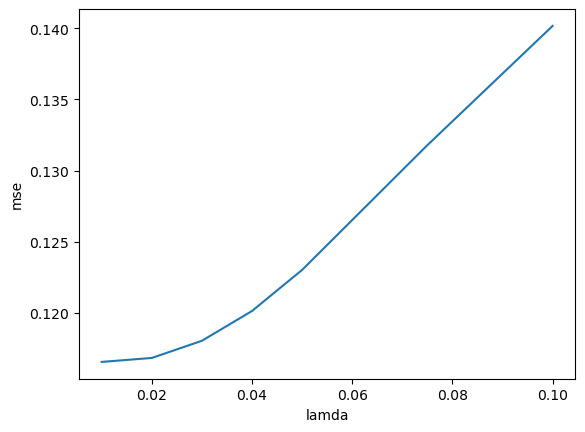

In [75]:
plt.xlabel('lamda')
plt.ylabel('mse')
lamdas = [i *2 for i in alphas]
plt.plot(lamdas, mses)

In [9]:
# Here we produce results for alpha=0.08 which corresponds to lambda=0.04
lasso = Lasso(alpha=0.08)
lasso.fit(X_train, y_train)
Lasso(alpha=0.08)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)


lassoreg_coefficient = pd.DataFrame()
lassoreg_coefficient["Features"] = X_train.columns
lassoreg_coefficient['Coef Estimate'] = pd.Series(lasso.coef_)
lassoreg_coefficient

,Features,Coef Estimate
0,LotArea,0.021863
1,OverallQual,0.315249
2,OverallCond,0.000000
3,YearBuilt,0.041599
4,YearRemodAdd,0.048198
5,BsmtFinSF1,0.102037
6,BsmtUnfSF,-0.000000
7,TotalBsmtSF,0.110506
8,1stFlrSF,0.031187
9,2ndFlrSF,0.000000


In [10]:
# Calculate mse for test set when Hull's lambda =0.04
alpha=0.04/2
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
print(mse(y_test,pred))

0.12541988653891775


In [11]:
# Calculate the average value of the weights (bias)
avg_weights = pd.Series(lasso.coef_).mean()
avg_weights

0.03180761524779948

###### Selecting alpha based on generalized cross-validation (an efficient form of LOOCV)

In [86]:
##Instead of arbitrarily choosing lambda =0.04,
##it would be better to use cross-validation to choose the tuning parameter alpha. 
##We can do this using the cross-validated ridge regression function, LassoCV(). 
##By default, the function performs generalized cross-validation (an efficient form of LOOCV), 
##though this can be changed using the argument cv.
##Selecting lambda
##Fit Lasso regression through cross validation

from sklearn.linear_model import LassoCV
regr_cv=LassoCV(alphas=range(1,50))
model_cv1=regr_cv.fit(X_train,y_train)
model_cv1.alpha_

C:\Users\thano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


49

In [58]:
# MSE at the validation dataset
lasso=Lasso(alpha=model_cv1.alpha_)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_val)
print(mse(y_val,pred))

1.1261866283560396


In [60]:
# MSE at the test dataset
lasso=Lasso(alpha=model_cv1.alpha_)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
print(mse(y_test,pred))

0.9879229718540211


###### Selecting alpha based on k - fold  cross-validation

In [82]:
##We can also select alpha based on the cross-validated ridge regression function, LassoCV(). 
##Selecting lambda
##Fit Lasso regression through cross validation

from sklearn.linear_model import LassoCV
regr_cv= LassoCV(alphas = None, cv = 10, max_iter = 100000)
model_cv2=regr_cv.fit(X_train,y_train)
model_cv2.alpha_

C:\Users\thano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.005637136472209141

In [83]:
# MSE at the validation dataset
lasso=Lasso(alpha=model_cv2.alpha_)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_val)
print(mse(y_val,pred))

0.11649288992474192


In [84]:
# MSE at the test dataset
lasso=Lasso(alpha=model_cv2.alpha_)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
print(mse(y_test,pred))

0.11886996279710277


In [85]:
# Here we produce results for alpha=0.006 which corresponds to lambda=0.012
lasso = Lasso(alpha=model_cv2.alpha_)
lasso.fit(X_train, y_train)

# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)


lassoreg_coefficient = pd.DataFrame()
lassoreg_coefficient["Features"] = X_train.columns
lassoreg_coefficient['Coef Estimate'] = pd.Series(lasso.coef_)
lassoreg_coefficient

,Features,Coef Estimate
0,LotArea,0.077394
1,OverallQual,0.228340
2,OverallCond,0.081748
3,YearBuilt,0.137336
4,YearRemodAdd,0.032224
5,BsmtFinSF1,0.121676
6,BsmtUnfSF,-0.000000
7,TotalBsmtSF,0.107277
8,1stFlrSF,0.038082
9,2ndFlrSF,0.000000


In [32]:
lassoreg_coefficient.to_csv('lassoreg_coefficient_kfold.csv')

In [87]:
print('R squared training set', round(lasso.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))

R squared training set 88.44
R squared test set 87.78
